<a href="https://colab.research.google.com/github/DhivyaSriLingala/EGN6216---AI-Systems-Dhivya-Sri-Lingala/blob/main/text_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns


!pip install neattext
import neattext.functions as nfx


from sklearn.model_selection import train_test_split

In [8]:
data=pd.read_csv("https://raw.githubusercontent.com/DhivyaSriLingala/EGN6216---AI-Systems-Dhivya-Sri-Lingala/refs/heads/main/datasets/emotion_dataset.csv")

In [10]:
data

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...
...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...
34788,joy,The world didnt give it to me..so the world MO...
34789,anger,A man robbed me today .
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO..."


In [11]:
data.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [12]:
data['Emotion'].value_counts()

,count
Emotion,
joy,11045
sadness,6722
fear,5410
anger,4297
surprise,4062
neutral,2254
disgust,856
shame,146


<Axes: xlabel='Emotion', ylabel='count'>

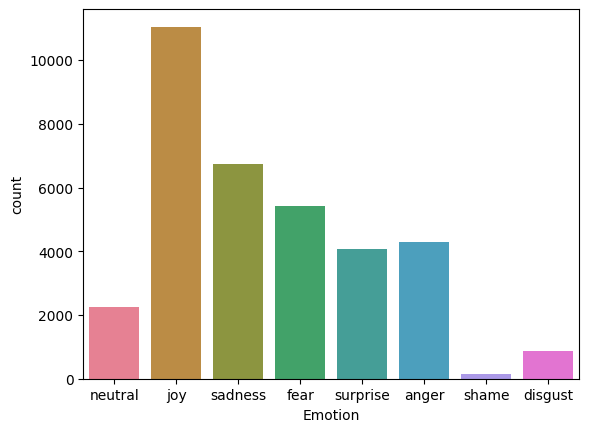

In [17]:
sns.countplot(x='Emotion',data=data,palette='husl',hue='Emotion',legend=False)

## Preprocessing the Data

In [24]:
data['Preprocess_data'] = data['Text'].apply(nfx.remove_userhandles)  #removing the user handles

In [25]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [26]:
data['Preprocess_data']=data['Preprocess_data'].apply(nfx.remove_stopwords)

In [27]:
data

,Emotion,Text,Preprocess_data
0,neutral,Why ?,?
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3,joy,Such an eye ! The true hazel eye-and so brill...,eye ! true hazel eye-and brilliant ! Regular f...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe.. hugggzzz u .! babe naamazed nga ako...
...,...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift! Hope like it! hand wear ! It'll warm! Lol
34788,joy,The world didnt give it to me..so the world MO...,world didnt me..so world DEFINITELY cnt away!!!
34789,anger,A man robbed me today .,man robbed today .
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...","Youu JEALOUSY, #Losing YOU..."


**Splitting the data into input and target variable**

In [31]:
X=data['Preprocess_data']    #features that are used as inputs for training the data
y=data['Emotion']      #labels are the target variable

In [32]:
X

,Preprocess_data
0,?
1,Sage Act upgrade list tommorow.
2,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3,eye ! true hazel eye-and brilliant ! Regular f...
4,ugh babe.. hugggzzz u .! babe naamazed nga ako...
...,...
34787,gift! Hope like it! hand wear ! It'll warm! Lol
34788,world didnt me..so world DEFINITELY cnt away!!!
34789,man robbed today .
34790,"Youu JEALOUSY, #Losing YOU..."


In [33]:
y

,Emotion
0,neutral
1,joy
2,sadness
3,joy
4,joy
...,...
34787,surprise
34788,joy
34789,anger
34790,fear


In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=42)

In [36]:
X_train

,Preprocess_data
5379,think ?
3620,grief-stricken widow destroyed cricket clothes...
26029,"` 's dying embarrassment . """
18931,Stuck train I'm 4 stops away home hungry there...
28643,"Overjoyed prospect , found difficult conceal e..."
...,...
34376,en plus mon mur est visible de friends friend.
13387,ohno. left cheesecake barn #nocheesecakeforme
22405,dude opposite feminine finger(s)/nails #manhan...
22714,"Dear Lord , stupid , thought Scarlet , saw Cam..."


In [37]:
X_test

,Preprocess_data
26694,"u know david ruffin, Shelia e, force upcoming ..."
5673,"considerable public disquiet , bugger Parkhurs..."
18342,breaking dawn pretty good. havent watched it. ...
16590,awfully different seeing big Albert cardinal u...
17318,"Wow, Redskins schooling Dallas, talk"
...,...
18751,"funny talk time, moved emailed now... dont tal..."
31957,Nearly went flying puddle cross ice death trap...
5731,9. biggest fear needles. can't stand getting s...
19939,"` sad mummy nasty ? "" said ."


In [38]:
y_train

,Emotion
5379,anger
3620,sadness
26029,shame
18931,anger
28643,joy
...,...
34376,fear
13387,sadness
22405,joy
22714,joy


In [39]:
y_test

,Emotion
26694,joy
5673,fear
18342,surprise
16590,sadness
17318,surprise
...,...
18751,sadness
31957,joy
5731,fear
19939,sadness


In [40]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [43]:
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),
                          ('lr',LogisticRegression(solver='saga',max_iter=1000))])
pipe_lr.fit(X_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()),
                ('lr', LogisticRegression(max_iter=1000, solver='saga'))])

In [44]:
pipe_lr.score(X_test,y_test)

0.6351791530944625

In [46]:
pipe_svm = Pipeline(steps=[('cv',CountVectorizer()),('svc', SVC(kernel = 'rbf', C = 10))])
pipe_svm.fit(X_train,y_train)
pipe_svm.score(X_test,y_test)

0.6301973558152902

In [47]:
pipe_rf = Pipeline(steps=[('cv',CountVectorizer()),('rf', RandomForestClassifier(n_estimators=10))])
pipe_rf.fit(X_train,y_train)
pipe_rf.score(X_test,y_test)

0.5540333397202529

## Saving the model as pickle file

In [48]:
import joblib
pipeline_file = open("text_emotion.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()